<a href="https://colab.research.google.com/github/ishwariiic/ML_Projects/blob/main/Paddy_Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishwariiic","key":"69a780f716fcd0e33503282f1f8269e2"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!pip install kaggle


In [10]:
!kaggle competitions download -c paddy-disease-classification


 97% 0.99G/1.02G [00:08<00:00, 244MB/s]
100% 1.02G/1.02G [00:08<00:00, 128MB/s]


In [11]:
!unzip paddy-disease-classification.zip -d paddy_data

Streaming output truncated to the last 5000 lines.
  inflating: paddy_data/train_images/downy_mildew/100992.jpg  
  inflating: paddy_data/train_images/downy_mildew/100995.jpg  
  inflating: paddy_data/train_images/downy_mildew/101015.jpg  
  inflating: paddy_data/train_images/downy_mildew/101020.jpg  
  inflating: paddy_data/train_images/downy_mildew/101022.jpg  
  inflating: paddy_data/train_images/downy_mildew/101024.jpg  
  inflating: paddy_data/train_images/downy_mildew/101034.jpg  
  inflating: paddy_data/train_images/downy_mildew/101050.jpg  
  inflating: paddy_data/train_images/downy_mildew/101078.jpg  
  inflating: paddy_data/train_images/downy_mildew/101096.jpg  
  inflating: paddy_data/train_images/downy_mildew/101103.jpg  
  inflating: paddy_data/train_images/downy_mildew/101114.jpg  
  inflating: paddy_data/train_images/downy_mildew/101119.jpg  
  inflating: paddy_data/train_images/downy_mildew/101142.jpg  
  inflating: paddy_data/train_images/downy_mildew/101177.jpg  
  in

In [12]:
!ls paddy_data

sample_submission.csv  test_images  train.csv  train_images


In [14]:
df_train = pd.read_csv("paddy_data/train.csv")
print(df_train.head())
print(df_train.shape)


     image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45
(10407, 4)


In [15]:
df_train['label'].unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [16]:
df_train['variety'].unique()


array(['ADT45', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'Surya',
       'Zonal', 'AndraPonni', 'AtchayaPonni', 'RR'], dtype=object)

In [17]:
df_train['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [18]:
df_train['variety'].value_counts()


variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [19]:
df_train.describe()

age
count  10407.000000
mean      64.043624
std        8.958830
min       45.000000
25%       60.000000
50%       67.000000
75%       70.000000
max       82.000000

In [20]:
normal=df_train[df_train['label']=='normal']
normal=normal[normal['variety']=='ADT45']
five_normal=normal.image_id[:5].values
five_normal.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [21]:
dead=df_train[df_train['label']=='dead_heart']
dead=dead[dead['variety']=='ADT45']
five_dead=dead.image_id[:5].values
five_dead.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_train['variety'] = label_encoder.fit_transform(df_train['variety'])


df_train.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

<Axes: >

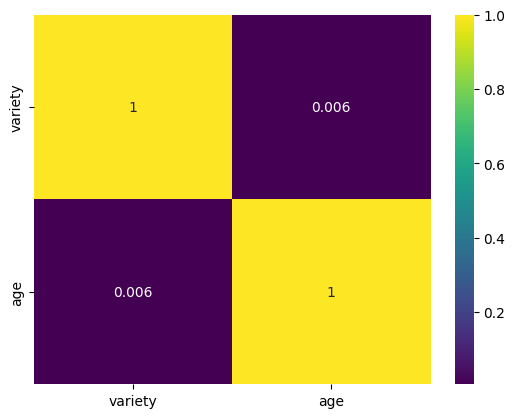

In [23]:
sns.heatmap(df_train[['variety', 'age']].corr(), annot=True, cmap='viridis')

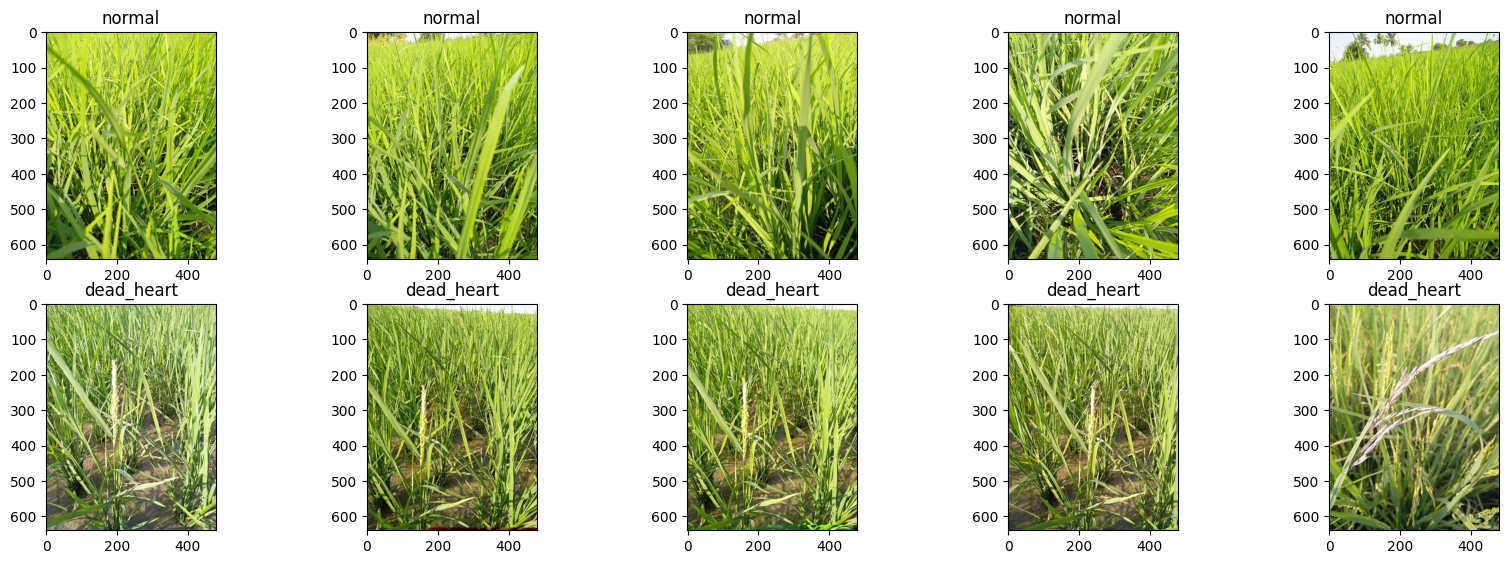

In [26]:
plt.figure(figsize=(20,10))
columns=5
path='paddy_data/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normal, five_dead))):
    plt.subplot(10//columns + 1, columns, i+1)

    if i<5:

        image=plt.imread(path+'normal/'+image_loc)
        plt.title('normal')
    else:
        image=plt.imread(path+'dead_heart/'+image_loc)
        plt.title('dead_heart')

    plt.imshow(image)

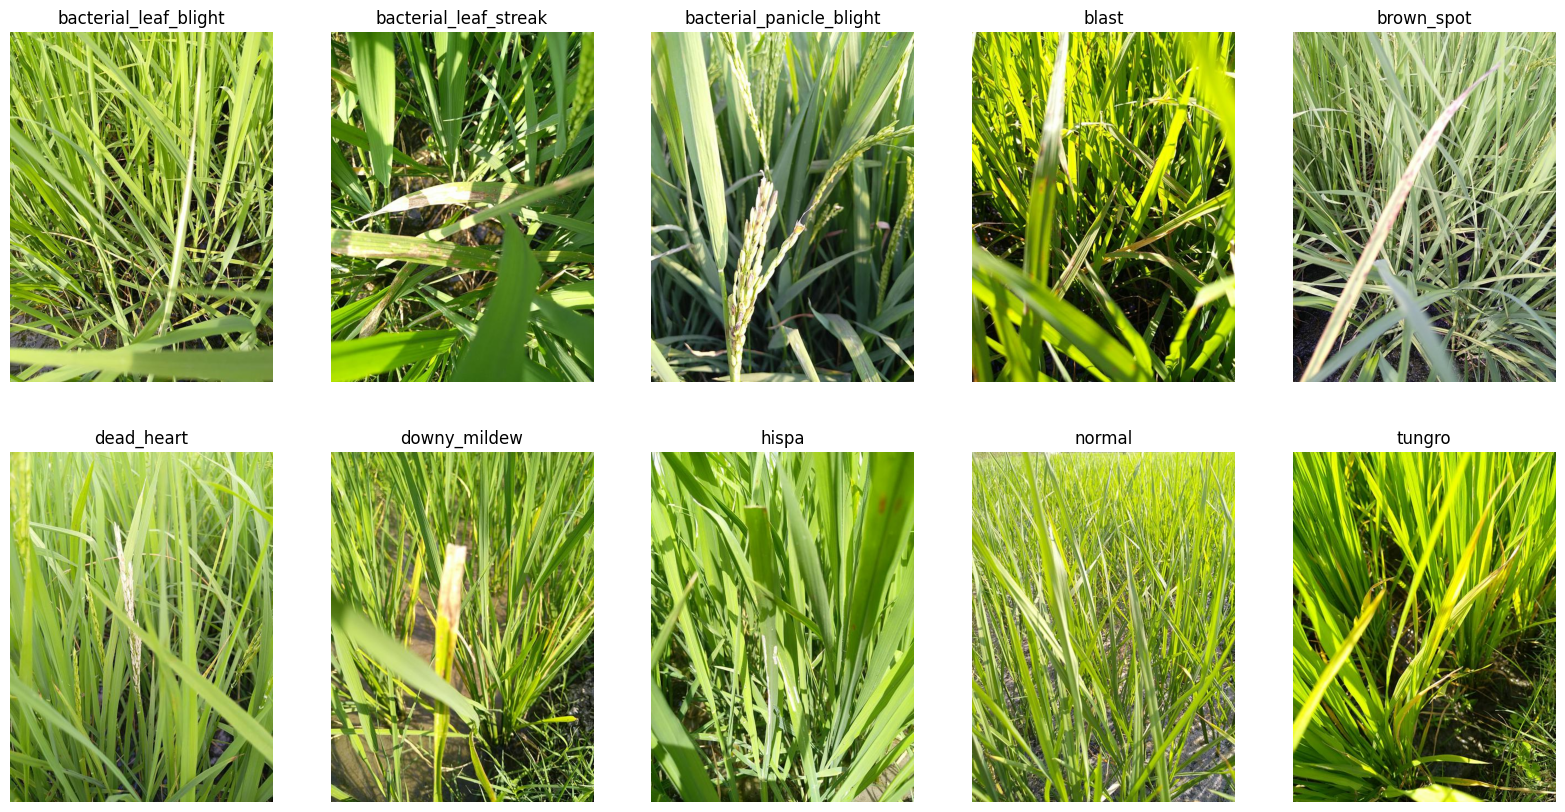

In [30]:
images = ['paddy_data/train_images/bacterial_leaf_blight/100023.jpg',
          'paddy_data/train_images/bacterial_leaf_streak/100042.jpg',
          'paddy_data/train_images/bacterial_panicle_blight/100043.jpg',
          'paddy_data/train_images/blast/100004.jpg',
          'paddy_data/train_images/brown_spot/100001.jpg',
          'paddy_data/train_images/dead_heart/100008.jpg',
          'paddy_data/train_images/downy_mildew/100017.jpg',
          'paddy_data/train_images/hispa/100003.jpg',
          'paddy_data/train_images/normal/100002.jpg',
          'paddy_data/train_images/tungro/100011.jpg']
diseases = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight',
            'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    img = plt.imread(images[i])
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(diseases[i])
    ax[i//5, i%5].axis('off')
plt.show()

In [33]:

batch_size = 32
img_height = 180
img_width = 180

path = 'paddy_data/train_images/'

In [34]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [35]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [37]:
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 180, 180, 3)
Shape of y_train:  (32,)


In [39]:
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

In [41]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print("Minimum Value = ", np.min(first_image),
      "\nMaximum Value = ", np.max(first_image))


Minimum Value =  0.0 
Maximum Value =  1.0


In [42]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
num_classes = len(class_names)
num_classes

10

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
# early stopping
earlystopping = EarlyStopping(patience=3, restore_best_weights=True)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[earlystopping])

# evaluat the model
loss, accuracy = model.evaluate(val_ds)

Epoch 1/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 693s 3s/step - accuracy: 0.9781 - loss: 0.0723 - val_accuracy: 0.8587 - val_loss: 0.8324
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.8606 - val_loss: 0.8599
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9862 - loss: 0.0424 - val_accuracy: 0.8520 - val_loss: 0.8018
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 678s 3s/step - accuracy: 0.9886 - loss: 0.0489 - val_accuracy: 0.8472 - val_loss: 0.8964
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.9793 - loss: 0.0665 - val_accuracy: 0.8683 - val_loss: 0.7984
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 670s 3s/step - accuracy: 0.9863 - loss: 0.0457 - val_accuracy: 0.8563 - val_loss: 0.8031
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9833 - loss: 0.0600 - val_accuracy: 0.8645 - val_loss: 0.9649
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.9889 - loss: 0.0320 - 

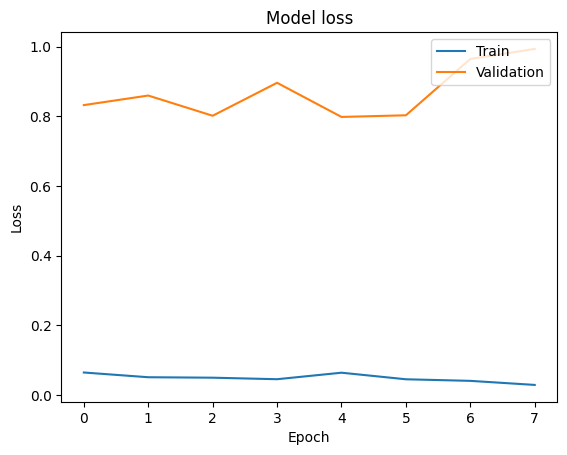

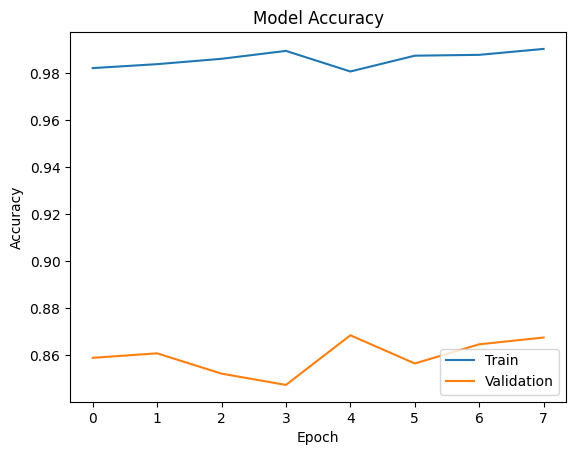

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [52]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'paddy_data/test_images',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode=None,
    shuffle=False)

Found 3469 files.


In [53]:
y_pred =  model.predict(test_ds)


109/109 ━━━━━━━━━━━━━━━━━━━━ 87s 795ms/step
